In [0]:
# Importing Necesaary Library
import glob
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

In [0]:
# Obtaining raw path of the images from Drive
dog_file_path = Path('/content/drive/My Drive/Colab Notebooks/Pet_Images/dogs')
cat_file_path = Path('/content/drive/My Drive/Colab Notebooks/Pet_Images/cats')

In [0]:
# Function to remove all the EXIF data and save the image to new path
# def remove_EXIF(image, path, image_index):
#   image = Image.open(image).convert('RGB')
#   # next 3 lines strip exif
#   data = list(image.getdata())
#   image_without_exif = Image.new(image.mode, image.size)
#   image_without_exif.putdata(data)
#   image_without_exif.save(path + '{}.jpg'.format(image_index))

# for index, image in enumerate(dog_files):
#   if index < 1501:
#     remove_EXIF(image, '/content/drive/My Drive/Colab Notebooks/Pet_Images/dogs/', index)

# for index, image in enumerate(cat_files):
#   if index < 1501:
#     remove_EXIF(image, '/content/drive/My Drive/Colab Notebooks/Pet_Images/cats/', index)

In [0]:
# Reading the JPG File
dog_files = [dog for dog in dog_file_path.glob('*.jpg')]
cat_files = [cat for cat in cat_file_path.glob('*.jpg')]
len(dog_files), len(cat_files)

(1501, 1501)

In [0]:
# Splitting the data into train & validation dataset
train_size = 1000
validation_size = 500
dog_train = np.random.choice(dog_files, size=train_size, replace=False)
cat_train = np.random.choice(cat_files, size=train_size, replace=False)

dog_files = list(set(dog_files) - (set(dog_train)))
cat_files = list(set(cat_files) - (set(cat_train)))

dog_validation = np.random.choice(dog_files, size=validation_size, replace=False)
cat_validation = np.random.choice(cat_files, size=validation_size, replace=False)

print('Dog datasets: ', dog_train.shape, dog_validation.shape)
print('Cat datasets: ', cat_train.shape, cat_validation.shape)

Dog datasets:  (1000,) (500,)
Cat datasets:  (1000,) (500,)


In [0]:
# Importing DL Library
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

Using TensorFlow backend.


In [0]:
# Preprocessing Image
dog_train_images = [img_to_array(load_img(img, target_size=(150, 150))) for img in dog_train]
dog_train_images = np.array(dog_train_images)
dog_train_labels = [1 for i in range(len(dog_train_images))]

In [0]:
# Preprocessing Image
cat_train_images = [img_to_array(load_img(img, target_size=(150, 150))) for img in cat_train]
cat_train_images = np.array(cat_train_images)
cat_train_labels = [0 for i in range(len(cat_train_images))]

In [0]:
# Preprocessing Image
train_images = np.concatenate([dog_train_images, cat_train_images])
train_labels = np.concatenate([dog_train_labels, cat_train_labels])

In [0]:
# Preprocessing Image
dog_validation_images = [img_to_array(load_img(img, target_size=(150, 150))) for img in dog_validation]
dog_validation_images = np.array(dog_validation_images)
dog_validation_labels = [1 for i in range(len(dog_validation_images))]

In [0]:
# Preprocessing Image
cat_validation_images = [img_to_array(load_img(img, target_size=(150, 150))) for img in cat_validation]
cat_validation_images = np.array(cat_validation_images)
cat_validation_labels = [0 for i in range(len(cat_validation_images))]

In [0]:
# Preprocessing Image
validation_images = np.concatenate([dog_validation_images, cat_validation_images])
validation_labels = np.concatenate([dog_validation_labels, cat_validation_labels])

In [0]:
print('Train Images:', train_images.shape, train_labels.shape)
print('Validation Images:', validation_images.shape, validation_labels.shape)

Train Images: (2000, 150, 150, 3) (2000,)
Validation Images: (1000, 150, 150, 3) (1000,)


In [0]:
# Scaling the Image features
train_images_scaled = train_images.astype('float32')
train_images_scaled /= 255

validation_images_scaled = validation_images.astype('float32')
validation_images_scaled /= 255

In [0]:
print(train_images[0].shape)

(150, 150, 3)


In [0]:
# Augmenting the Imges for better prediction & learning as well
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
# Fitting the data with augmentation
train_generator = train_datagen.flow(train_images, train_labels, batch_size=30)
val_generator = val_datagen.flow(validation_images, validation_labels, batch_size=20)

In [0]:
# Import DL Libraries
from keras.applications import vgg16
from keras.models import Model
import keras

In [0]:
# Transfer Learning
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

In [0]:
# Importing DL Libraries
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

In [0]:
# Model Building
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=(150, 150, 3)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
100/100 [==============================] - 33s 332ms/step - loss: 0.6452 - acc: 0.6857 - val_loss: 0.2962 - val_acc: 0.8710
Epoch 2/30
100/100 [==============================] - 27s 266ms/step - loss: 0.4317 - acc: 0.7948 - val_loss: 0.2851 - val_acc: 0.8600
Epoch 3/30
100/100 [==============================] - 28s 284ms/step - loss: 0.4200 - acc: 0.7873 - val_loss: 0.2985 - val_acc: 0.8520
Epoch 4/30
100/100 [==============================] - 27s 270ms/step - loss: 0.4180 - acc: 0.7975 - val_loss: 0.2703 - val_acc: 0.8870
Epoch 5/30
100/100 [==============================] - 28s 282ms/step - loss: 0.3890 - acc: 0.8190 - val_loss: 0.2666 - val_acc: 0.8770
Epoch 6/30
100/100 [==============================] - 28s 276ms/step - loss: 0.3776 - acc: 0.8303 - val_loss: 0

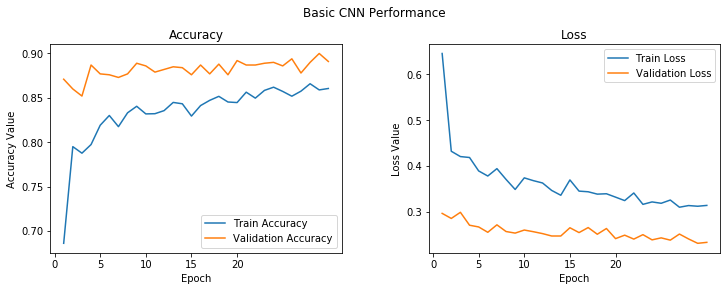

In [0]:
# Plotting The accuarcy & loss of train & validation data
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 21, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 21, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")